# Problem Statemet
```This Project understands how the student's performance (test score) is affected bu other variables such as Gender, Ethnicity, Parential level of Education, Lunch ad Test Preperation Course```

# Data Collection
```Dataset Source:``` https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Checking Duplicates

In [6]:
df.duplicated().sum()

0

* There are no duplicate values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From the description, all means are very close to each other ranging between 66 - 68.05
- All the standard deviations are very close to each other
- While there is a minimum score of 0 for math, for writing minimum score is much higher = 10 and reading it is 17

In [11]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

Categories in 'gender' variable:      ['female' 'male']


In [12]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [13]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [14]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [15]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [16]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## Printing the features
print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Columns for "Total Score" and "Average"

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of Students with full marks in Math {math_full}')
print(f'Number of Students with full marks in Reading {reading_full}')
print(f'Number of Students with full marks in Writing {writing_full}')

Number of Students with full marks in Math 7
Number of Students with full marks in Reading 17
Number of Students with full marks in Writing 14


In [20]:
reading_less_than_20 = df[df['reading score'] < 20]['average'].count()
writing_less_than_20 = df[df['writing score'] < 20]['average'].count()
math_less_than_20 = df[df['math score'] < 20]['average'].count()

print(f'Number of Students with less than 20 in Math {math_less_than_20}')
print(f'Number of Students with less than 20 in Reading {reading_less_than_20}')
print(f'Number of Students with less than 20 in Writing {writing_less_than_20}')

Number of Students with less than 20 in Math 4
Number of Students with less than 20 in Reading 1
Number of Students with less than 20 in Writing 3


#### **Insights:**

* Students are some what getting less score in Maths when compared to Reading and Writing Score

### VISUALIZATION

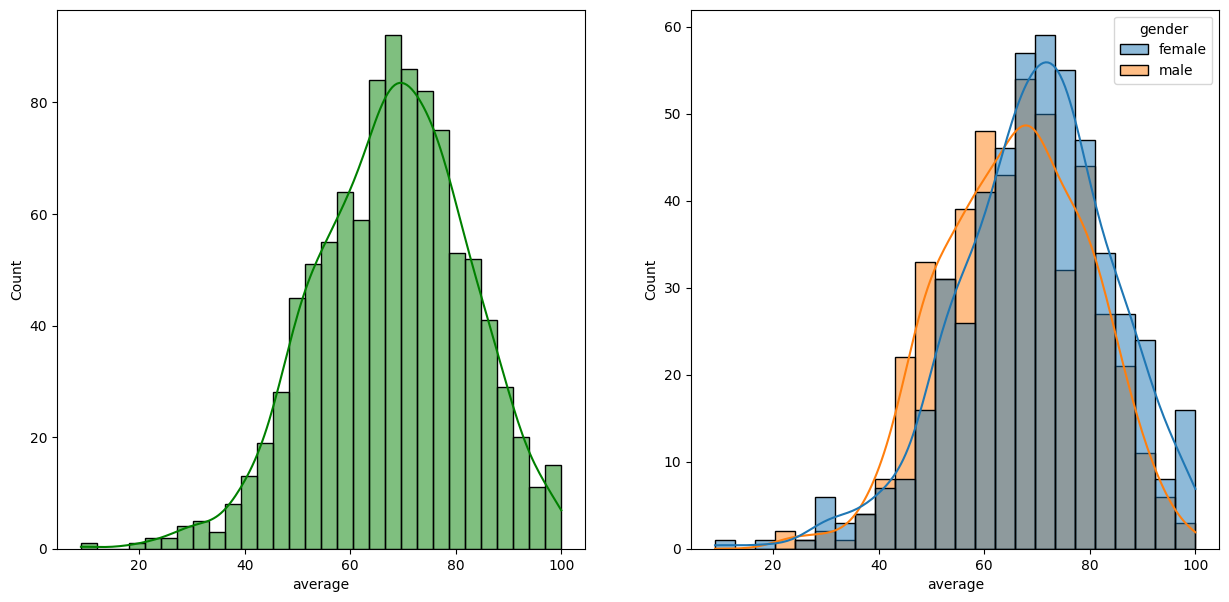

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

* Female Students tends to get more than the male students

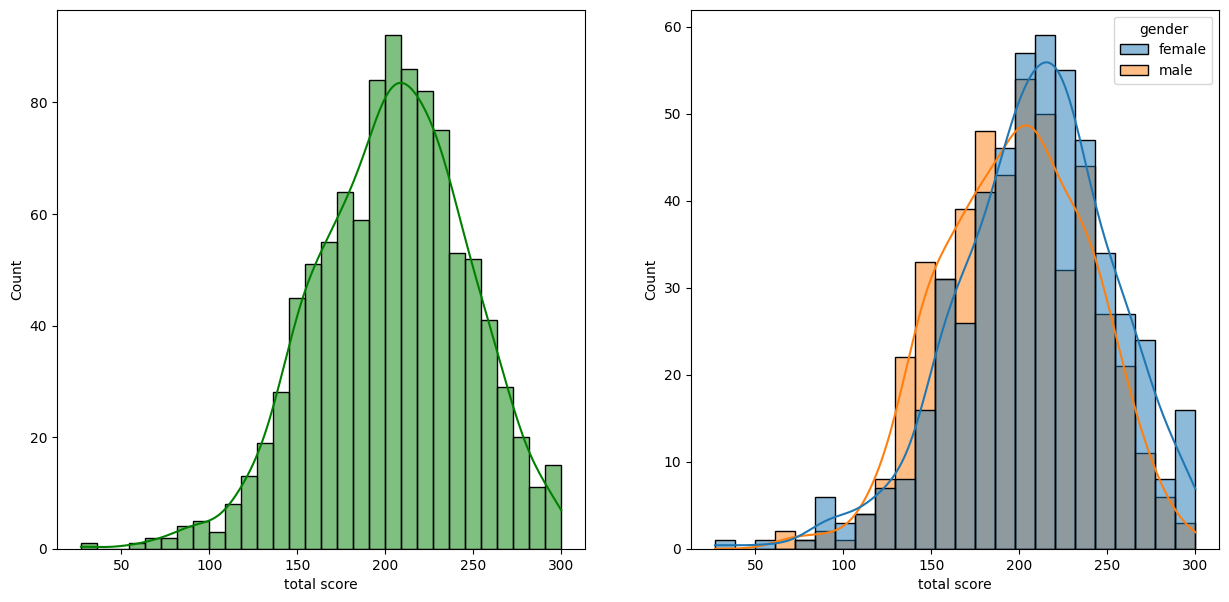

In [22]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='lunch', ylabel='count'>

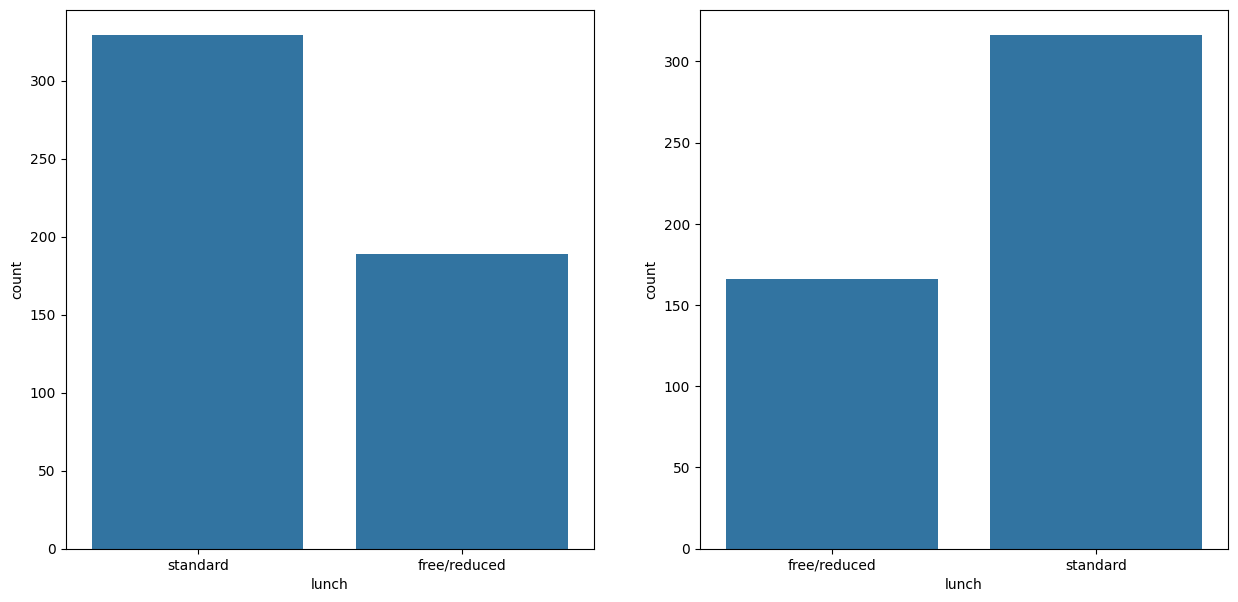

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.countplot(data=df[df['gender']=='female'],x='lunch')
plt.subplot(122)
sns.countplot(data=df[df['gender']=='male'],x='lunch')

<Axes: xlabel='average', ylabel='Count'>

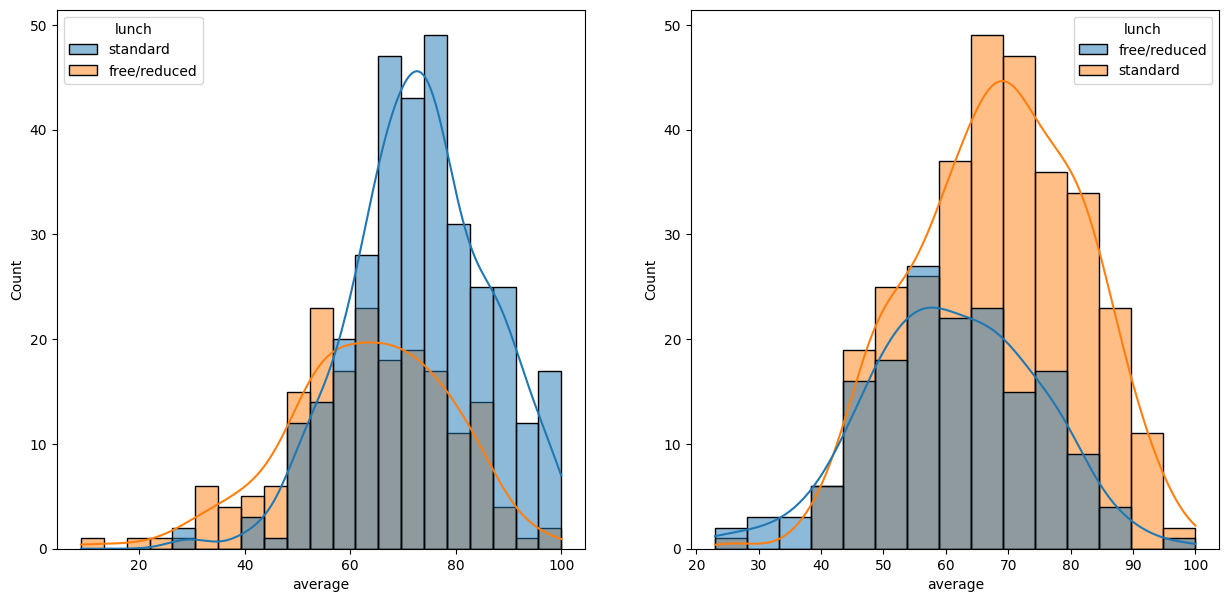

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(122)
sns.histplot(data = df[df['gender']=='male'],x='average',kde=True,hue='lunch')

* Students whose lunch style is Standard are performing good in the exams

<Axes: xlabel='average', ylabel='Count'>

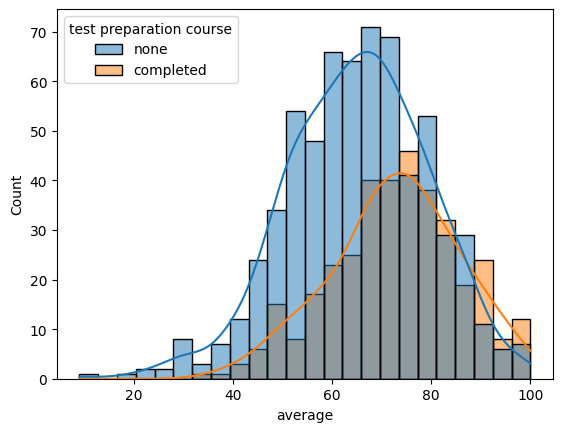

In [25]:
sns.histplot(data=df,x='average',hue='test preparation course',kde=True)

<Axes: xlabel='test preparation course', ylabel='count'>

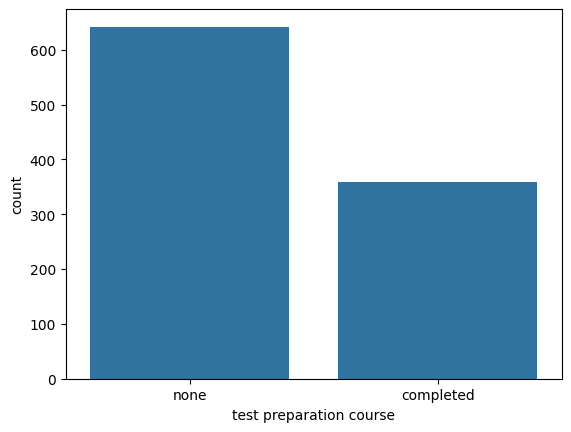

In [26]:
sns.countplot(data=df,x='test preparation course')

<Axes: xlabel='average', ylabel='Count'>

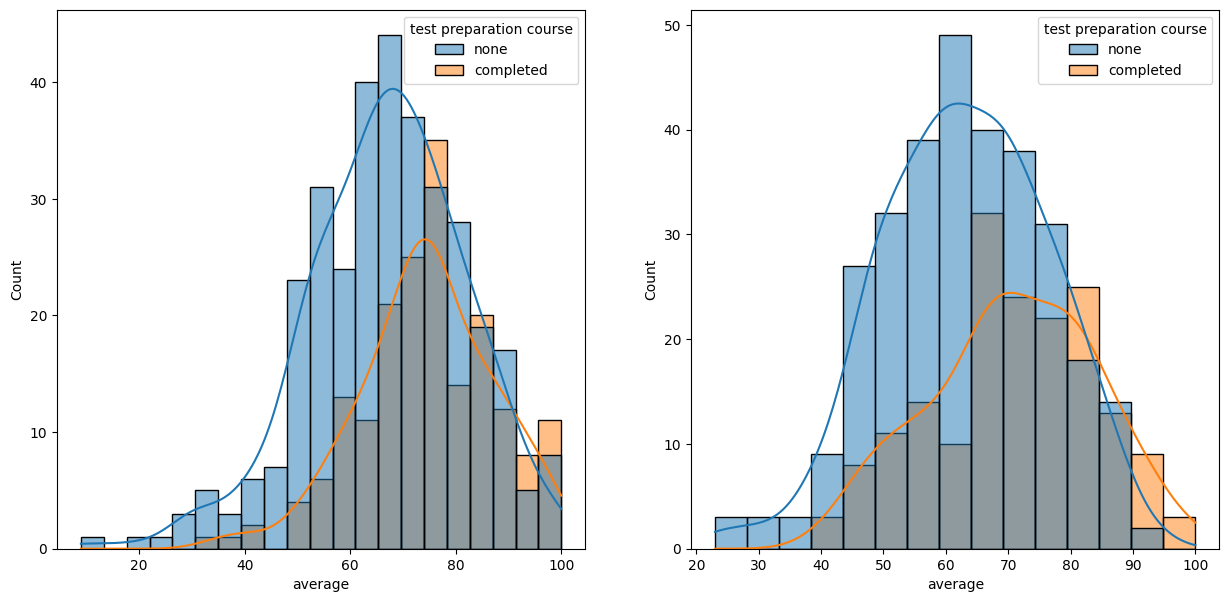

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='test preparation course')
plt.subplot(122)
sns.histplot(data = df[df['gender']=='male'],x='average',kde=True,hue='test preparation course')

* In both male and female on an average those who completes the test prepreration course has got good marks. We can see this observation by using the distribution curve

<Axes: xlabel='race/ethnicity', ylabel='count'>

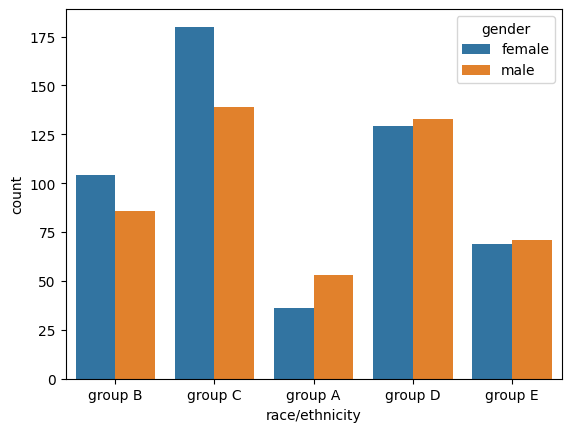

In [28]:
sns.countplot(data=df,x='race/ethnicity',hue='gender')

<Axes: xlabel='average', ylabel='Count'>

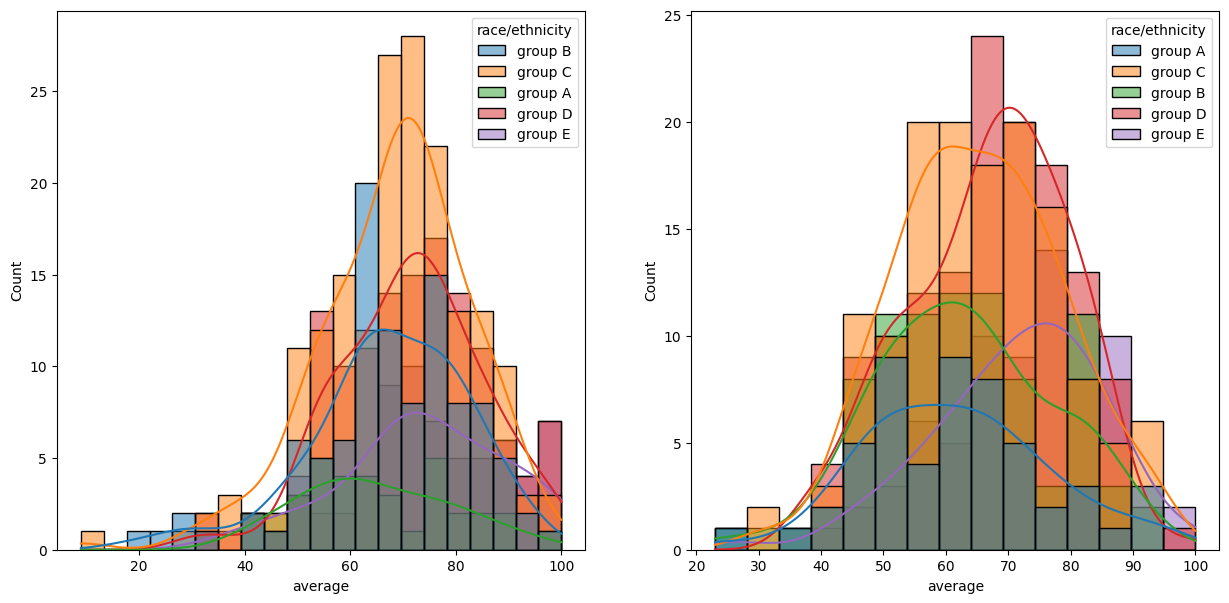

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df[df['gender']=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(122)
sns.histplot(data = df[df['gender']=='male'],x='average',kde=True,hue='race/ethnicity')

* Group C and group D Students are more in this data
* Group E students curve is mostly right skewed, so we can say they are performing well...

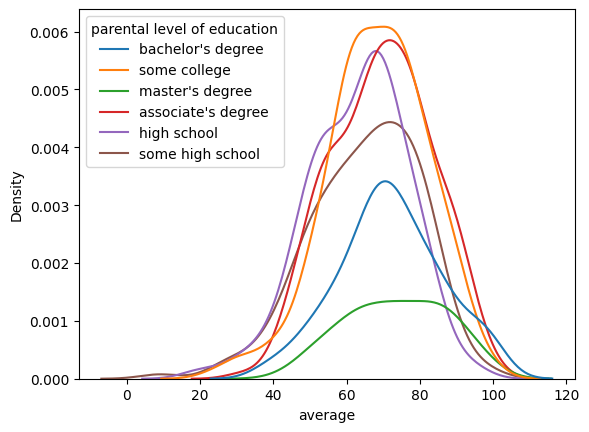

In [30]:
sns.kdeplot(data=df,x='average',hue='parental level of education')
plt.show()

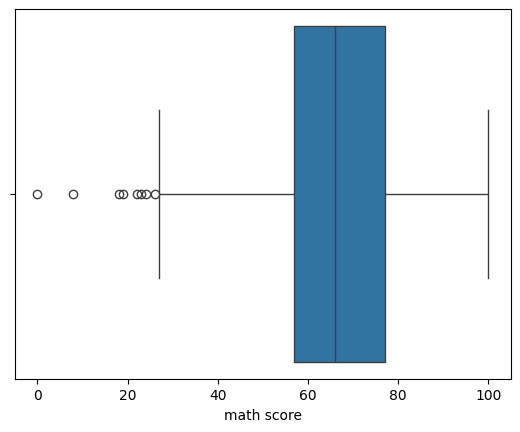

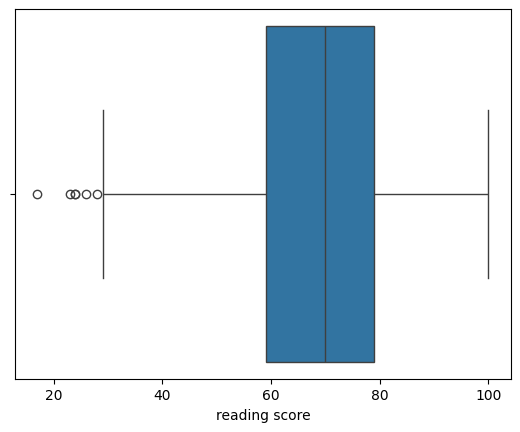

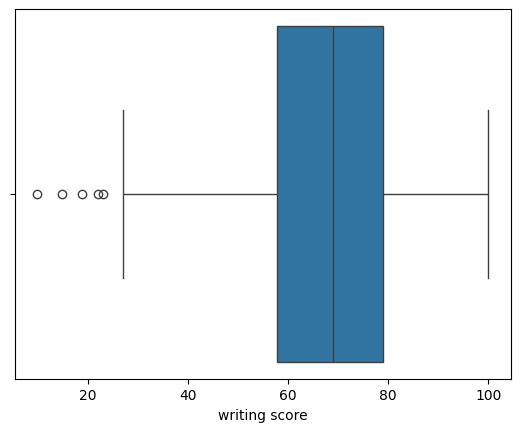

In [31]:
for feature in numerical_features:
    plt.figure()
    sns.boxplot(data=df,x=feature)
    plt.plot()